In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
from glob import glob
import os
import seaborn as sns
import xarray as xr

import matplotlib.pyplot as plt

sns.set(font="Helvetica")

seas = "djf"

In [2]:
diri = r'/Users/fadhlilrizki/Documents/PhD/thesis/dataout/'
diro = r'/Users/fadhlilrizki/Documents/PhD/thesis/figures/stats/'

In [3]:
ds_TE = xr.open_dataset(diri+"combined_wave_TopEnd_"+seas+".nc")
ds_TE

<xarray.Dataset>
Dimensions:    (list: 50, ncl1: 50)
Dimensions without coordinates: list, ncl1
Data variables:
    composite  (list) float32 ...
    median     (ncl1) float32 ...
    alpha      (list) float32 ...

In [4]:
combination = ["er_er_drydry",
               "er_er_wet_wet",
               
               "er_klv_drydry",
               "er_klv_drywet",
               "er_klv_wetdry",
               "er_klv_wetwet",
               
               "er_mjo_drydry",
               "er_mjo_drywet",
               "er_mjo_wetdry",
               "er_mjo_wetwet",
               
               "er_mrg_drydry",
               "er_mrg_drywet",
               "er_mrg_wetdry",
               "er_mrg_wetwet",
               
               "er_td_drydry",
               "er_td_drywet",
               "er_td_wetdry",
               "er_td_wetwet",
               
               "klv_klv_drydry",
               "klv_klv_wet_wet",
               
               "mjo_klv_drydry",
               "mjo_klv_drywet",
               "mjo_klv_wetdry",
               "mjo_klv_wetwet",
               
               "mjo_mjo_drydry",
               "mjo_mjo_wetwet",   
               
               "mrg_klv_drydry",
               "mrg_klv_drywet",
               "mrg_klv_wetdry",
               "mrg_klv_wetwet",
               
               "mrg_mjo_drydry",
               "mrg_mjo_drywet",
               "mrg_mjo_wetdry",
               "mrg_mjo_wetwet",
               
               "mrg_mrg_drydry",
               "mrg_mrg_wetwet",
               
               "mrg_td_drydry",
               "mrg_td_drywet",
               "mrg_td_wetdry",
               "mrg_td_wetwet",
               
               'td_klv_drydry',
               'td_klv_drywet',
               'td_klv_wetdry',
               'td_klv_wetwet',
               
               'td_mjo_drydry',
               'td_mjo_drywet',
               'td_mjo_wetdry',
               'td_mjo_wetwet',
               
               'td_td_drydry',
               'td_td_wetwet',
               
              ]

len(combination)

50

In [5]:
c = ds_TE["composite"]
a = ds_TE["alpha"]
ndays = ds_TE["composite"].attrs["ndays"]
ndays
# attrs["ndays"]

array([1061,  746,  488,   87,  309,   62,  607,  260,  369,  233,  376,
        196,  275,  138,  429,  211,  280,  145, 1137,  188,  647,  104,
        301,   45, 1421,  655,  410,   75,  198,   28,  501,  248,  254,
        113,  923,  455,  491,   94,  142,  131,  455,   60,  227,   41,
        558,  255,  279,  122, 1004,  501], dtype=int32)

In [6]:
cols = ["er-wet", "klv-wet", "mjo-wet", "mrg-wet", "td-wet", "er-dry", "klv-dry", "mjo-dry", "mrg-dry", "td-dry"]

In [7]:
rows = cols


In [8]:
df = []
counter = 0
for i in combination:
    val = c.values[counter]
    df.append(val)
    counter+=1
    
df = pd.DataFrame([df,combination]).transpose()
df = df.rename(columns={0:"prec",1:"combination"})

df["prec"] = df["prec"].astype(float)
df["prec"]

0    -1.762132
1     2.295934
2    -1.908116
3    -1.124440
4     2.462623
5     2.035149
6    -3.555882
7     2.419032
8     0.228663
9     5.857037
10   -2.182466
11   -0.879068
12    1.300316
13    3.772121
14   -2.654310
15   -0.332207
16    1.306466
17    4.618603
18   -0.379280
19    0.077788
20   -2.300505
21   -1.751930
22    3.957575
23    4.834817
24   -2.094178
25    3.836909
26   -1.016083
27   -0.328889
28    0.746626
29    0.966431
30   -2.899580
31    3.345173
32   -0.860808
33    4.254797
34   -0.981426
35    0.747970
36   -1.633395
37    1.639942
38   -0.349452
39    2.037465
40   -1.237538
41   -1.252992
42    1.282935
43    2.892237
44   -2.945049
45    2.900169
46   -0.785527
47    5.886138
48   -1.145919
49    1.268241
Name: prec, dtype: float64

In [9]:
df_a = []
counter = 0
for i in combination:
    val = a.values[counter]
    df_a.append(val)
    counter+=1
    
df_a = pd.DataFrame([df_a,combination]).transpose()
df_a = df_a.rename(columns={0:"alpha",1:"combination"})

df_a["alpha"] = df_a["alpha"].astype(float)
df_a["alpha"]

0     1.0
1     1.0
2     1.0
3     0.0
4     1.0
5     1.0
6     1.0
7     1.0
8     0.0
9     1.0
10    1.0
11    0.0
12    1.0
13    1.0
14    1.0
15    0.0
16    1.0
17    1.0
18    0.0
19    0.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.0
27    0.0
28    0.0
29    0.0
30    1.0
31    1.0
32    1.0
33    1.0
34    1.0
35    1.0
36    1.0
37    0.0
38    0.0
39    1.0
40    1.0
41    0.0
42    1.0
43    1.0
44    1.0
45    1.0
46    0.0
47    1.0
48    1.0
49    1.0
Name: alpha, dtype: float64

In [10]:
df_n = []
counter = 0
for i in combination:
    val = ndays[counter]
    df_n.append(val)
    counter+=1
    
df_n = pd.DataFrame([df_n,combination]).transpose()
df_n = df_n.rename(columns={0:"ndays",1:"combination"})

df_n["ndays"] = df_n["ndays"].astype(float)
df_n

,ndays,combination
0,1061.0,er_er_drydry
1,746.0,er_er_wet_wet
2,488.0,er_klv_drydry
3,87.0,er_klv_drywet
4,309.0,er_klv_wetdry
5,62.0,er_klv_wetwet
6,607.0,er_mjo_drydry
7,260.0,er_mjo_drywet
8,369.0,er_mjo_wetdry
9,233.0,er_mjo_wetwet


In [11]:
# df["prec"] = [df["prec"].iloc[i].astype(float) for i in range(len(df["prec"]))]

In [12]:
x = pd.DataFrame(columns=cols, index=rows)
a = pd.DataFrame(columns=cols, index=rows)
n = pd.DataFrame(columns=cols, index=rows)

In [13]:

x.loc["er-dry","er-dry"] = df["prec"].loc[0].astype(float)
x.loc["er-wet","er-wet"] = df["prec"].loc[1].astype(float)

#erklv
x.loc["er-dry","klv-dry"] = df["prec"].loc[2].astype(float)
x.loc["er-dry","klv-wet"] = df["prec"].loc[3].astype(float)
x.loc["er-wet","klv-dry"] = df["prec"].loc[4].astype(float)
x.loc["er-wet","klv-wet"] = df["prec"].loc[5].astype(float)

x.loc["klv-dry","er-dry"] = df["prec"].loc[2].astype(float)
x.loc["klv-wet","er-dry"] = df["prec"].loc[3].astype(float)
x.loc["klv-dry","er-wet"] = df["prec"].loc[4].astype(float)
x.loc["klv-wet","er-wet"] = df["prec"].loc[5].astype(float)

#ermjo
x.loc["er-dry","mjo-dry"] = df["prec"].loc[6].astype(float)
x.loc["er-dry","mjo-wet"] = df["prec"].loc[7].astype(float)
x.loc["er-wet","mjo-dry"] = df["prec"].loc[8].astype(float)
x.loc["er-wet","mjo-wet"] = df["prec"].loc[9].astype(float)

x.loc["mjo-dry","er-dry"] = df["prec"].loc[6].astype(float)
x.loc["mjo-wet","er-dry"] = df["prec"].loc[7].astype(float)
x.loc["mjo-dry","er-wet"] = df["prec"].loc[8].astype(float)
x.loc["mjo-wet","er-wet"] = df["prec"].loc[9].astype(float)

#ermrg
x.loc["er-dry","mrg-dry"] = df["prec"].loc[10].astype(float)
x.loc["er-dry","mrg-wet"] = df["prec"].loc[11].astype(float)
x.loc["er-wet","mrg-dry"] = df["prec"].loc[12].astype(float)
x.loc["er-wet","mrg-wet"] = df["prec"].loc[13].astype(float)

x.loc["mrg-dry","er-dry"] = df["prec"].loc[10].astype(float)
x.loc["mrg-wet","er-dry"] = df["prec"].loc[11].astype(float)
x.loc["mrg-dry","er-wet"] = df["prec"].loc[12].astype(float)
x.loc["mrg-wet","er-wet"] = df["prec"].loc[13].astype(float)

#ertd
x.loc["er-dry","td-dry"] = df["prec"].loc[14].astype(float)
x.loc["er-dry","td-wet"] = df["prec"].loc[15].astype(float)
x.loc["er-wet","td-dry"] = df["prec"].loc[16].astype(float)
x.loc["er-wet","td-wet"] = df["prec"].loc[17].astype(float)

x.loc["td-dry","er-dry"] = df["prec"].loc[14].astype(float)
x.loc["td-wet","er-dry"] = df["prec"].loc[15].astype(float)
x.loc["td-dry","er-wet"] = df["prec"].loc[16].astype(float)
x.loc["td-wet","er-wet"] = df["prec"].loc[17].astype(float)


#klvklv
x.loc["klv-dry","klv-dry"] = df["prec"].loc[18].astype(float)
x.loc["klv-wet","klv-wet"] = df["prec"].loc[19].astype(float)

#mjoklv
x.loc["mjo-dry","klv-dry"] = df["prec"].loc[20].astype(float)
x.loc["mjo-dry","klv-wet"] = df["prec"].loc[21].astype(float)
x.loc["mjo-wet","klv-dry"] = df["prec"].loc[22].astype(float)
x.loc["mjo-wet","klv-wet"] = df["prec"].loc[23].astype(float)

x.loc["klv-dry","mjo-dry"] = df["prec"].loc[20].astype(float)
x.loc["klv-wet","mjo-dry"] = df["prec"].loc[21].astype(float)
x.loc["klv-dry","mjo-wet"] = df["prec"].loc[22].astype(float)
x.loc["klv-wet","mjo-wet"] = df["prec"].loc[23].astype(float)

#mjomjo
x.loc["mjo-dry","mjo-dry"] = df["prec"].loc[24].astype(float)
x.loc["mjo-wet","mjo-wet"] = df["prec"].loc[25].astype(float)

#mrgklv
x.loc["mrg-dry","klv-dry"] = df["prec"].loc[26].astype(float)
x.loc["mrg-dry","klv-wet"] = df["prec"].loc[27].astype(float)
x.loc["mrg-wet","klv-dry"] = df["prec"].loc[28].astype(float)
x.loc["mrg-wet","klv-wet"] = df["prec"].loc[29].astype(float)

x.loc["klv-dry","mrg-dry"] = df["prec"].loc[26].astype(float)
x.loc["klv-wet","mrg-dry"] = df["prec"].loc[27].astype(float)
x.loc["klv-dry","mrg-wet"] = df["prec"].loc[28].astype(float)
x.loc["klv-wet","mrg-wet"] = df["prec"].loc[29].astype(float)

#mrgmjo
x.loc["mrg-dry","mjo-dry"] = df["prec"].loc[30].astype(float)
x.loc["mrg-dry","mjo-wet"] = df["prec"].loc[31].astype(float)
x.loc["mrg-wet","mjo-dry"] = df["prec"].loc[32].astype(float)
x.loc["mrg-wet","mjo-wet"] = df["prec"].loc[33].astype(float)

x.loc["mjo-dry","mrg-dry"] = df["prec"].loc[30].astype(float)
x.loc["mjo-wet","mrg-dry"] = df["prec"].loc[31].astype(float)
x.loc["mjo-dry","mrg-wet"] = df["prec"].loc[32].astype(float)
x.loc["mjo-wet","mrg-wet"] = df["prec"].loc[33].astype(float)

#mrgmrg
x.loc["mrg-dry","mrg-dry"] = df["prec"].loc[34].astype(float)
x.loc["mrg-wet","mrg-wet"] = df["prec"].loc[35].astype(float)

#mrgtd
x.loc["mrg-dry","td-dry"] = df["prec"].loc[36].astype(float)
x.loc["mrg-dry","td-wet"] = df["prec"].loc[37].astype(float)
x.loc["mrg-wet","td-dry"] = df["prec"].loc[38].astype(float)
x.loc["mrg-wet","td-wet"] = df["prec"].loc[39].astype(float)

x.loc["td-dry","mrg-dry"] = df["prec"].loc[36].astype(float)
x.loc["td-wet","mrg-dry"] = df["prec"].loc[37].astype(float)
x.loc["td-dry","mrg-wet"] = df["prec"].loc[38].astype(float)
x.loc["td-wet","mrg-wet"] = df["prec"].loc[39].astype(float)

#tdklv
x.loc["td-dry","klv-dry"] = df["prec"].loc[40].astype(float)
x.loc["td-dry","klv-wet"] = df["prec"].loc[41].astype(float)
x.loc["td-wet","klv-dry"] = df["prec"].loc[42].astype(float)
x.loc["td-wet","klv-wet"] = df["prec"].loc[43].astype(float)

x.loc["klv-dry","td-dry"] = df["prec"].loc[40].astype(float)
x.loc["klv-wet","td-dry"] = df["prec"].loc[41].astype(float)
x.loc["klv-dry","td-wet"] = df["prec"].loc[42].astype(float)
x.loc["klv-wet","td-wet"] = df["prec"].loc[43].astype(float)

#tdmjo
x.loc["td-dry","mjo-dry"] = df["prec"].loc[44].astype(float)
x.loc["td-dry","mjo-wet"] = df["prec"].loc[45].astype(float)
x.loc["td-wet","mjo-dry"] = df["prec"].loc[46].astype(float)
x.loc["td-wet","mjo-wet"] = df["prec"].loc[47].astype(float)

x.loc["mjo-dry","td-dry"] = df["prec"].loc[44].astype(float)
x.loc["mjo-wet","td-dry"] = df["prec"].loc[45].astype(float)
x.loc["mjo-dry","td-wet"] = df["prec"].loc[46].astype(float)
x.loc["mjo-wet","td-wet"] = df["prec"].loc[47].astype(float)

#tdtd
x.loc["td-dry","td-dry"] = df["prec"].loc[48].astype(float)
x.loc["td-wet","td-wet"] = df["prec"].loc[49].astype(float)

In [14]:

a.loc["er-dry","er-dry"] = df_a["alpha"].loc[0].astype(float)
a.loc["er-wet","er-wet"] = df_a["alpha"].loc[1].astype(float)

#erklv
a.loc["er-dry","klv-dry"] = df_a["alpha"].loc[2].astype(float)
a.loc["er-dry","klv-wet"] = df_a["alpha"].loc[3].astype(float)
a.loc["er-wet","klv-dry"] = df_a["alpha"].loc[4].astype(float)
a.loc["er-wet","klv-wet"] = df_a["alpha"].loc[5].astype(float)

a.loc["klv-dry","er-dry"] = df_a["alpha"].loc[2].astype(float)
a.loc["klv-wet","er-dry"] = df_a["alpha"].loc[3].astype(float)
a.loc["klv-dry","er-wet"] = df_a["alpha"].loc[4].astype(float)
a.loc["klv-wet","er-wet"] = df_a["alpha"].loc[5].astype(float)

#ermjo
a.loc["er-dry","mjo-dry"] = df_a["alpha"].loc[6].astype(float)
a.loc["er-dry","mjo-wet"] = df_a["alpha"].loc[7].astype(float)
a.loc["er-wet","mjo-dry"] = df_a["alpha"].loc[8].astype(float)
a.loc["er-wet","mjo-wet"] = df_a["alpha"].loc[9].astype(float)

a.loc["mjo-dry","er-dry"] = df_a["alpha"].loc[6].astype(float)
a.loc["mjo-wet","er-dry"] = df_a["alpha"].loc[7].astype(float)
a.loc["mjo-dry","er-wet"] = df_a["alpha"].loc[8].astype(float)
a.loc["mjo-wet","er-wet"] = df_a["alpha"].loc[9].astype(float)

#ermrg
a.loc["er-dry","mrg-dry"] = df_a["alpha"].loc[10].astype(float)
a.loc["er-dry","mrg-wet"] = df_a["alpha"].loc[11].astype(float)
a.loc["er-wet","mrg-dry"] = df_a["alpha"].loc[12].astype(float)
a.loc["er-wet","mrg-wet"] = df_a["alpha"].loc[13].astype(float)

a.loc["mrg-dry","er-dry"] = df_a["alpha"].loc[10].astype(float)
a.loc["mrg-wet","er-dry"] = df_a["alpha"].loc[11].astype(float)
a.loc["mrg-dry","er-wet"] = df_a["alpha"].loc[12].astype(float)
a.loc["mrg-wet","er-wet"] = df_a["alpha"].loc[13].astype(float)

#ertd
a.loc["er-dry","td-dry"] = df_a["alpha"].loc[14].astype(float)
a.loc["er-dry","td-wet"] = df_a["alpha"].loc[15].astype(float)
a.loc["er-wet","td-dry"] = df_a["alpha"].loc[16].astype(float)
a.loc["er-wet","td-wet"] = df_a["alpha"].loc[17].astype(float)

a.loc["td-dry","er-dry"] = df_a["alpha"].loc[14].astype(float)
a.loc["td-wet","er-dry"] = df_a["alpha"].loc[15].astype(float)
a.loc["td-dry","er-wet"] = df_a["alpha"].loc[16].astype(float)
a.loc["td-wet","er-wet"] = df_a["alpha"].loc[17].astype(float)


#klvklv
a.loc["klv-dry","klv-dry"] = df_a["alpha"].loc[18].astype(float)
a.loc["klv-wet","klv-wet"] = df_a["alpha"].loc[19].astype(float)

#mjoklv
a.loc["mjo-dry","klv-dry"] = df_a["alpha"].loc[20].astype(float)
a.loc["mjo-dry","klv-wet"] = df_a["alpha"].loc[21].astype(float)
a.loc["mjo-wet","klv-dry"] = df_a["alpha"].loc[22].astype(float)
a.loc["mjo-wet","klv-wet"] = df_a["alpha"].loc[23].astype(float)

a.loc["klv-dry","mjo-dry"] = df_a["alpha"].loc[20].astype(float)
a.loc["klv-wet","mjo-dry"] = df_a["alpha"].loc[21].astype(float)
a.loc["klv-dry","mjo-wet"] = df_a["alpha"].loc[22].astype(float)
a.loc["klv-wet","mjo-wet"] = df_a["alpha"].loc[23].astype(float)

#mjomjo
a.loc["mjo-dry","mjo-dry"] = df_a["alpha"].loc[24].astype(float)
a.loc["mjo-wet","mjo-wet"] = df_a["alpha"].loc[25].astype(float)

#mrgklv
a.loc["mrg-dry","klv-dry"] = df_a["alpha"].loc[26].astype(float)
a.loc["mrg-dry","klv-wet"] = df_a["alpha"].loc[27].astype(float)
a.loc["mrg-wet","klv-dry"] = df_a["alpha"].loc[28].astype(float)
a.loc["mrg-wet","klv-wet"] = df_a["alpha"].loc[29].astype(float)

a.loc["klv-dry","mrg-dry"] = df_a["alpha"].loc[26].astype(float)
a.loc["klv-wet","mrg-dry"] = df_a["alpha"].loc[27].astype(float)
a.loc["klv-dry","mrg-wet"] = df_a["alpha"].loc[28].astype(float)
a.loc["klv-wet","mrg-wet"] = df_a["alpha"].loc[29].astype(float)

#mrgmjo
a.loc["mrg-dry","mjo-dry"] = df_a["alpha"].loc[30].astype(float)
a.loc["mrg-dry","mjo-wet"] = df_a["alpha"].loc[31].astype(float)
a.loc["mrg-wet","mjo-dry"] = df_a["alpha"].loc[32].astype(float)
a.loc["mrg-wet","mjo-wet"] = df_a["alpha"].loc[33].astype(float)

a.loc["mjo-dry","mrg-dry"] = df_a["alpha"].loc[30].astype(float)
a.loc["mjo-wet","mrg-dry"] = df_a["alpha"].loc[31].astype(float)
a.loc["mjo-dry","mrg-wet"] = df_a["alpha"].loc[32].astype(float)
a.loc["mjo-wet","mrg-wet"] = df_a["alpha"].loc[33].astype(float)

#mrgmrg
a.loc["mrg-dry","mrg-dry"] = df_a["alpha"].loc[34].astype(float)
a.loc["mrg-wet","mrg-wet"] = df_a["alpha"].loc[35].astype(float)

#mrgtd
a.loc["mrg-dry","td-dry"] = df_a["alpha"].loc[36].astype(float)
a.loc["mrg-dry","td-wet"] = df_a["alpha"].loc[37].astype(float)
a.loc["mrg-wet","td-dry"] = df_a["alpha"].loc[38].astype(float)
a.loc["mrg-wet","td-wet"] = df_a["alpha"].loc[39].astype(float)

a.loc["td-dry","mrg-dry"] = df_a["alpha"].loc[36].astype(float)
a.loc["td-wet","mrg-dry"] = df_a["alpha"].loc[37].astype(float)
a.loc["td-dry","mrg-wet"] = df_a["alpha"].loc[38].astype(float)
a.loc["td-wet","mrg-wet"] = df_a["alpha"].loc[39].astype(float)

#tdklv
a.loc["td-dry","klv-dry"] = df_a["alpha"].loc[40].astype(float)
a.loc["td-dry","klv-wet"] = df_a["alpha"].loc[41].astype(float)
a.loc["td-wet","klv-dry"] = df_a["alpha"].loc[42].astype(float)
a.loc["td-wet","klv-wet"] = df_a["alpha"].loc[43].astype(float)

a.loc["klv-dry","td-dry"] = df_a["alpha"].loc[40].astype(float)
a.loc["klv-wet","td-dry"] = df_a["alpha"].loc[41].astype(float)
a.loc["klv-dry","td-wet"] = df_a["alpha"].loc[42].astype(float)
a.loc["klv-wet","td-wet"] = df_a["alpha"].loc[43].astype(float)

#tdmjo
a.loc["td-dry","mjo-dry"] = df_a["alpha"].loc[44].astype(float)
a.loc["td-dry","mjo-wet"] = df_a["alpha"].loc[45].astype(float)
a.loc["td-wet","mjo-dry"] = df_a["alpha"].loc[46].astype(float)
a.loc["td-wet","mjo-wet"] = df_a["alpha"].loc[47].astype(float)

a.loc["mjo-dry","td-dry"] = df_a["alpha"].loc[44].astype(float)
a.loc["mjo-wet","td-dry"] = df_a["alpha"].loc[45].astype(float)
a.loc["mjo-dry","td-wet"] = df_a["alpha"].loc[46].astype(float)
a.loc["mjo-wet","td-wet"] = df_a["alpha"].loc[47].astype(float)

#tdtd
a.loc["td-dry","td-dry"] = df_a["alpha"].loc[48].astype(float)
a.loc["td-wet","td-wet"] = df_a["alpha"].loc[49].astype(float)

In [15]:

n.loc["er-dry","er-dry"] = df_n["ndays"].loc[0].astype(float)
n.loc["er-wet","er-wet"] = df_n["ndays"].loc[1].astype(float)

#erklv
n.loc["er-dry","klv-dry"] = df_n["ndays"].loc[2].astype(float)
n.loc["er-dry","klv-wet"] = df_n["ndays"].loc[3].astype(float)
n.loc["er-wet","klv-dry"] = df_n["ndays"].loc[4].astype(float)
n.loc["er-wet","klv-wet"] = df_n["ndays"].loc[5].astype(float)

n.loc["klv-dry","er-dry"] = df_n["ndays"].loc[2].astype(float)
n.loc["klv-wet","er-dry"] = df_n["ndays"].loc[3].astype(float)
n.loc["klv-dry","er-wet"] = df_n["ndays"].loc[4].astype(float)
n.loc["klv-wet","er-wet"] = df_n["ndays"].loc[5].astype(float)

#ermjo
n.loc["er-dry","mjo-dry"] = df_n["ndays"].loc[6].astype(float)
n.loc["er-dry","mjo-wet"] = df_n["ndays"].loc[7].astype(float)
n.loc["er-wet","mjo-dry"] = df_n["ndays"].loc[8].astype(float)
n.loc["er-wet","mjo-wet"] = df_n["ndays"].loc[9].astype(float)

n.loc["mjo-dry","er-dry"] = df_n["ndays"].loc[6].astype(float)
n.loc["mjo-wet","er-dry"] = df_n["ndays"].loc[7].astype(float)
n.loc["mjo-dry","er-wet"] = df_n["ndays"].loc[8].astype(float)
n.loc["mjo-wet","er-wet"] = df_n["ndays"].loc[9].astype(float)

#ermrg
n.loc["er-dry","mrg-dry"] = df_n["ndays"].loc[10].astype(float)
n.loc["er-dry","mrg-wet"] = df_n["ndays"].loc[11].astype(float)
n.loc["er-wet","mrg-dry"] = df_n["ndays"].loc[12].astype(float)
n.loc["er-wet","mrg-wet"] = df_n["ndays"].loc[13].astype(float)

n.loc["mrg-dry","er-dry"] = df_n["ndays"].loc[10].astype(float)
n.loc["mrg-wet","er-dry"] = df_n["ndays"].loc[11].astype(float)
n.loc["mrg-dry","er-wet"] = df_n["ndays"].loc[12].astype(float)
n.loc["mrg-wet","er-wet"] = df_n["ndays"].loc[13].astype(float)

#ertd
n.loc["er-dry","td-dry"] = df_n["ndays"].loc[14].astype(float)
n.loc["er-dry","td-wet"] = df_n["ndays"].loc[15].astype(float)
n.loc["er-wet","td-dry"] = df_n["ndays"].loc[16].astype(float)
n.loc["er-wet","td-wet"] = df_n["ndays"].loc[17].astype(float)

n.loc["td-dry","er-dry"] = df_n["ndays"].loc[14].astype(float)
n.loc["td-wet","er-dry"] = df_n["ndays"].loc[15].astype(float)
n.loc["td-dry","er-wet"] = df_n["ndays"].loc[16].astype(float)
n.loc["td-wet","er-wet"] = df_n["ndays"].loc[17].astype(float)


#klvklv
n.loc["klv-dry","klv-dry"] = df_n["ndays"].loc[18].astype(float)
n.loc["klv-wet","klv-wet"] = df_n["ndays"].loc[19].astype(float)

#mjoklv
n.loc["mjo-dry","klv-dry"] = df_n["ndays"].loc[20].astype(float)
n.loc["mjo-dry","klv-wet"] = df_n["ndays"].loc[21].astype(float)
n.loc["mjo-wet","klv-dry"] = df_n["ndays"].loc[22].astype(float)
n.loc["mjo-wet","klv-wet"] = df_n["ndays"].loc[23].astype(float)

n.loc["klv-dry","mjo-dry"] = df_n["ndays"].loc[20].astype(float)
n.loc["klv-wet","mjo-dry"] = df_n["ndays"].loc[21].astype(float)
n.loc["klv-dry","mjo-wet"] = df_n["ndays"].loc[22].astype(float)
n.loc["klv-wet","mjo-wet"] = df_n["ndays"].loc[23].astype(float)

#mjomjo
n.loc["mjo-dry","mjo-dry"] = df_n["ndays"].loc[24].astype(float)
n.loc["mjo-wet","mjo-wet"] = df_n["ndays"].loc[25].astype(float)

#mrgklv
n.loc["mrg-dry","klv-dry"] = df_n["ndays"].loc[26].astype(float)
n.loc["mrg-dry","klv-wet"] = df_n["ndays"].loc[27].astype(float)
n.loc["mrg-wet","klv-dry"] = df_n["ndays"].loc[28].astype(float)
n.loc["mrg-wet","klv-wet"] = df_n["ndays"].loc[29].astype(float)

n.loc["klv-dry","mrg-dry"] = df_n["ndays"].loc[26].astype(float)
n.loc["klv-wet","mrg-dry"] = df_n["ndays"].loc[27].astype(float)
n.loc["klv-dry","mrg-wet"] = df_n["ndays"].loc[28].astype(float)
n.loc["klv-wet","mrg-wet"] = df_n["ndays"].loc[29].astype(float)

#mrgmjo
n.loc["mrg-dry","mjo-dry"] = df_n["ndays"].loc[30].astype(float)
n.loc["mrg-dry","mjo-wet"] = df_n["ndays"].loc[31].astype(float)
n.loc["mrg-wet","mjo-dry"] = df_n["ndays"].loc[32].astype(float)
n.loc["mrg-wet","mjo-wet"] = df_n["ndays"].loc[33].astype(float)

n.loc["mjo-dry","mrg-dry"] = df_n["ndays"].loc[30].astype(float)
n.loc["mjo-wet","mrg-dry"] = df_n["ndays"].loc[31].astype(float)
n.loc["mjo-dry","mrg-wet"] = df_n["ndays"].loc[32].astype(float)
n.loc["mjo-wet","mrg-wet"] = df_n["ndays"].loc[33].astype(float)

#mrgmrg
n.loc["mrg-dry","mrg-dry"] = df_n["ndays"].loc[34].astype(float)
n.loc["mrg-wet","mrg-wet"] = df_n["ndays"].loc[35].astype(float)

#mrgtd
n.loc["mrg-dry","td-dry"] = df_n["ndays"].loc[36].astype(float)
n.loc["mrg-dry","td-wet"] = df_n["ndays"].loc[37].astype(float)
n.loc["mrg-wet","td-dry"] = df_n["ndays"].loc[38].astype(float)
n.loc["mrg-wet","td-wet"] = df_n["ndays"].loc[39].astype(float)

n.loc["td-dry","mrg-dry"] = df_n["ndays"].loc[36].astype(float)
n.loc["td-wet","mrg-dry"] = df_n["ndays"].loc[37].astype(float)
n.loc["td-dry","mrg-wet"] = df_n["ndays"].loc[38].astype(float)
n.loc["td-wet","mrg-wet"] = df_n["ndays"].loc[39].astype(float)

#tdklv
n.loc["td-dry","klv-dry"] = df_n["ndays"].loc[40].astype(float)
n.loc["td-dry","klv-wet"] = df_n["ndays"].loc[41].astype(float)
n.loc["td-wet","klv-dry"] = df_n["ndays"].loc[42].astype(float)
n.loc["td-wet","klv-wet"] = df_n["ndays"].loc[43].astype(float)

n.loc["klv-dry","td-dry"] = df_n["ndays"].loc[40].astype(float)
n.loc["klv-wet","td-dry"] = df_n["ndays"].loc[41].astype(float)
n.loc["klv-dry","td-wet"] = df_n["ndays"].loc[42].astype(float)
n.loc["klv-wet","td-wet"] = df_n["ndays"].loc[43].astype(float)

#tdmjo
n.loc["td-dry","mjo-dry"] = df_n["ndays"].loc[44].astype(float)
n.loc["td-dry","mjo-wet"] = df_n["ndays"].loc[45].astype(float)
n.loc["td-wet","mjo-dry"] = df_n["ndays"].loc[46].astype(float)
n.loc["td-wet","mjo-wet"] = df_n["ndays"].loc[47].astype(float)

n.loc["mjo-dry","td-dry"] = df_n["ndays"].loc[44].astype(float)
n.loc["mjo-wet","td-dry"] = df_n["ndays"].loc[45].astype(float)
n.loc["mjo-dry","td-wet"] = df_n["ndays"].loc[46].astype(float)
n.loc["mjo-wet","td-wet"] = df_n["ndays"].loc[47].astype(float)

#tdtd
n.loc["td-dry","td-dry"] = df_n["ndays"].loc[48].astype(float)
n.loc["td-wet","td-wet"] = df_n["ndays"].loc[49].astype(float)

In [16]:
if seas=='mam':
    x = x.iloc[:,x.columns != 'td-dry']
    x = x.iloc[x.index != 'td-dry',:]
    
    a = a.iloc[:,a.columns != 'td-dry']
    a = a.iloc[a.index != 'td-dry',:]
    
    n = n.iloc[:,n.columns != 'td-dry']
    n = n.iloc[n.index != 'td-dry',:]


In [17]:
a

,er-wet,klv-wet,mjo-wet,mrg-wet,td-wet,er-dry,klv-dry,mjo-dry,mrg-dry,td-dry
er-wet,1.0,1.0,1.0,1.0,1.0,NaN,1.0,0.0,1.0,1.0
klv-wet,1.0,0.0,1.0,0.0,1.0,0.0,NaN,1.0,0.0,0.0
mjo-wet,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0
mrg-wet,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,NaN,0.0
td-wet,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,NaN
er-dry,NaN,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
klv-dry,1.0,NaN,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
mjo-dry,0.0,1.0,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
mrg-dry,1.0,0.0,1.0,NaN,0.0,1.0,1.0,1.0,1.0,1.0
td-dry,1.0,0.0,1.0,0.0,NaN,1.0,1.0,1.0,1.0,1.0


In [18]:
n

,er-wet,klv-wet,mjo-wet,mrg-wet,td-wet,er-dry,klv-dry,mjo-dry,mrg-dry,td-dry
er-wet,746.0,62.0,233.0,138.0,145.0,NaN,309.0,369.0,275.0,280.0
klv-wet,62.0,188.0,45.0,28.0,41.0,87.0,NaN,104.0,75.0,60.0
mjo-wet,233.0,45.0,655.0,113.0,122.0,260.0,301.0,NaN,248.0,255.0
mrg-wet,138.0,28.0,113.0,455.0,131.0,196.0,198.0,254.0,NaN,142.0
td-wet,145.0,41.0,122.0,131.0,501.0,211.0,227.0,279.0,94.0,NaN
er-dry,NaN,87.0,260.0,196.0,211.0,1061.0,488.0,607.0,376.0,429.0
klv-dry,309.0,NaN,301.0,198.0,227.0,488.0,1137.0,647.0,410.0,455.0
mjo-dry,369.0,104.0,NaN,254.0,279.0,607.0,647.0,1421.0,501.0,558.0
mrg-dry,275.0,75.0,248.0,NaN,94.0,376.0,410.0,501.0,923.0,491.0
td-dry,280.0,60.0,255.0,142.0,NaN,429.0,455.0,558.0,491.0,1004.0


In [19]:
for i in x.columns:
    x[i] = x[i].astype(float)
    
# x["er-wet"]

In [20]:
for i in a.columns:
    a[i] = a[i].astype(float)
    
# a["er-wet"]

for i in n.columns:
    n[i] = n[i].astype(float)
    
# a["ER"]

In [21]:

if seas=='djf':
    x.columns = ["ER", "Kelvin", "MJO", "MRG", "TD-type","ER", "Kelvin", "MJO", "MRG", "TD-type" ]
    x.index   = ["ER", "Kelvin", "MJO", "MRG", "TD-type","ER", "Kelvin", "MJO", "MRG", "TD-type" ]

    a.columns = ["ER", "Kelvin", "MJO", "MRG", "TD-type","ER", "Kelvin", "MJO", "MRG", "TD-type" ]
    a.index   = ["ER", "Kelvin", "MJO", "MRG", "TD-type","ER", "Kelvin", "MJO", "MRG", "TD-type" ]

    n.columns = ["ER", "Kelvin", "MJO", "MRG", "TD-type","ER", "Kelvin", "MJO", "MRG", "TD-type" ]
    n.index   = ["ER", "Kelvin", "MJO", "MRG", "TD-type","ER", "Kelvin", "MJO", "MRG", "TD-type" ]

elif seas=='mam':
    x.columns = ["ER", "Kelvin", "MJO", "MRG", "TD-type","ER", "Kelvin", "MJO", "MRG"]
    x.index   = ["ER", "Kelvin", "MJO", "MRG", "TD-type","ER", "Kelvin", "MJO", "MRG"]

    a.columns = ["ER", "Kelvin", "MJO", "MRG", "TD-type","ER", "Kelvin", "MJO", "MRG"]
    a.index   = ["ER", "Kelvin", "MJO", "MRG", "TD-type","ER", "Kelvin", "MJO", "MRG"]

    n.columns = ["ER", "Kelvin", "MJO", "MRG", "TD-type","ER", "Kelvin", "MJO", "MRG"]
    n.index   = ["ER", "Kelvin", "MJO", "MRG", "TD-type","ER", "Kelvin", "MJO", "MRG"]
   
    
a.iloc[0,:]

ER         1.0
Kelvin     1.0
MJO        1.0
MRG        1.0
TD-type    1.0
ER         NaN
Kelvin     1.0
MJO        0.0
MRG        1.0
TD-type    1.0
Name: ER, dtype: float64

In [22]:
x_sig = x.round(1).where(a==0,x.round(1).astype(str)+"*")
# x_sig = x_sig.where(x_sig!=pd.NaN,"-")
x_sig

,ER,Kelvin,MJO,MRG,TD-type,ER,Kelvin,MJO,MRG,TD-type
ER,2.3*,2.0*,5.9*,3.8*,4.6*,nan*,2.5*,0.2,1.3*,1.3*
Kelvin,2.0*,0.1,4.8*,1.0,2.9*,-1.1,nan*,-1.8*,-0.3,-1.3
MJO,5.9*,4.8*,3.8*,4.3*,5.9*,2.4*,4.0*,nan*,3.3*,2.9*
MRG,3.8*,1.0,4.3*,0.7*,2.0*,-0.9,0.7,-0.9*,nan*,-0.3
TD-type,4.6*,2.9*,5.9*,2.0*,1.3*,-0.3,1.3*,-0.8,1.6,nan*
ER,nan*,-1.1,2.4*,-0.9,-0.3,-1.8*,-1.9*,-3.6*,-2.2*,-2.7*
Kelvin,2.5*,nan*,4.0*,0.7,1.3*,-1.9*,-0.4,-2.3*,-1.0*,-1.2*
MJO,0.2,-1.8*,nan*,-0.9*,-0.8,-3.6*,-2.3*,-2.1*,-2.9*,-2.9*
MRG,1.3*,-0.3,3.3*,nan*,1.6,-2.2*,-1.0*,-2.9*,-1.0*,-1.6*
TD-type,1.3*,-1.3,2.9*,-0.3,nan*,-2.7*,-1.2*,-2.9*,-1.6*,-1.1*


In [23]:
nint = n.astype('Int32')
n_label = "("+nint.astype(str)+")"
# n_label = n_label.where(n_label==np.NaN,"-")

Text(0.5, 1.0, 'Top End')

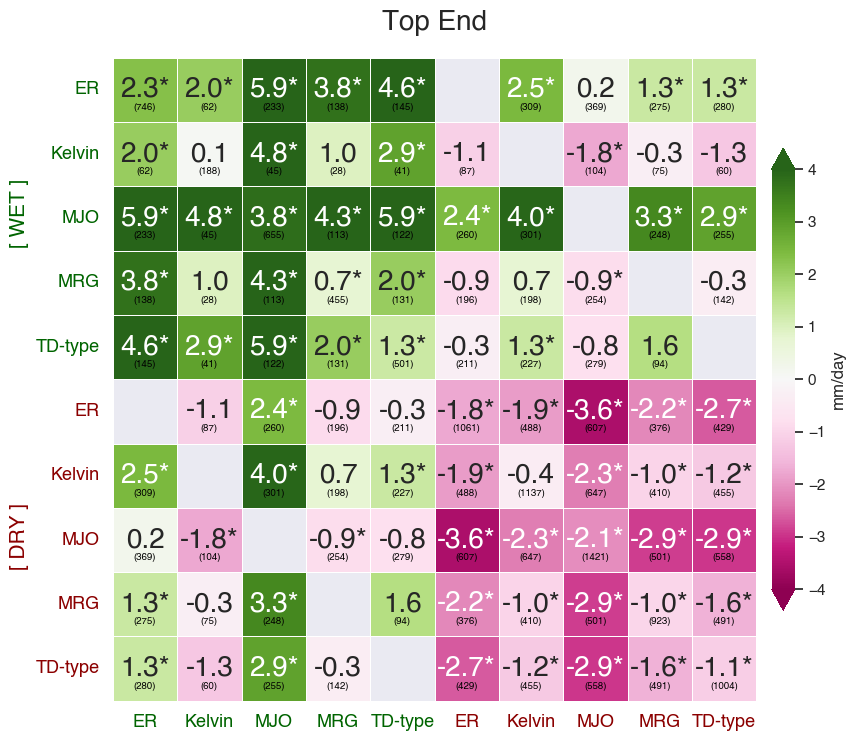

In [24]:
fig = plt.figure(figsize = [10, 10])
g = sns.heatmap(x,vmin=-4,vmax=4, 
                 annot = x_sig, 
                 annot_kws={'fontsize':20,'fontweight':1000,'va':'bottom'},
                 fmt='', 
                 linewidths = .5,
                 cmap = plt.cm.get_cmap('PiYG'), cbar_kws={
                     'label': 'mm/day', 'shrink': 0.6, 'pad':0.02, 'extend':'both'},
                square=True,
               
               )

h = sns.heatmap(n, 
                 annot = n_label, 
                 annot_kws={'fontsize':7,'fontweight':10,'va':'top','color':'black'},
                 fmt='', 
                 linewidths = .5,
#                 cmap = "white",
                alpha = 0.0,
                cbar=False,
                square=True,
               
               )

import matplotlib
for t in h.texts:
    trans = t.get_transform()
    offs = matplotlib.transforms.ScaledTranslation(0., 0.2,
                    matplotlib.transforms.IdentityTransform())
    t.set_transform( offs + trans )


g.tick_params(axis='x', colors='darkgreen')
g.tick_params(axis='y', colors='darkgreen')

for label in enumerate(g.xaxis.get_ticklabels()):
    label[1].set_fontsize(13)
    if label[0]>4:
        label[1].set_color("darkred")
  
for label in enumerate(g.yaxis.get_ticklabels()):
    label[1].set_fontsize(13)
    label[1].set_rotation(-360)
#     print(label[0])
    if label[0]>4:
        label[1].set_color("darkred")

g.text(-1.6,2.9,"[ WET ]",fontsize=15,rotation=90,color="darkgreen",weight="extra bold")
g.text(-1.6,7.9,"[ DRY ]",fontsize=15,rotation=90,color="darkred",weight="extra bold")

g.set_title("Top End", fontsize=20, pad=20)

In [25]:
x.columns
# flights_piv.columns

Index(['ER', 'Kelvin', 'MJO', 'MRG', 'TD-type', 'ER', 'Kelvin', 'MJO', 'MRG',
       'TD-type'],
      dtype='object')

In [26]:
droploc = x.columns.get_loc("Kelvin")
idrop = [i for i, x in enumerate(droploc) if x]
idrop

[1, 6]

Text(0.5, 1.0, 'Top End')

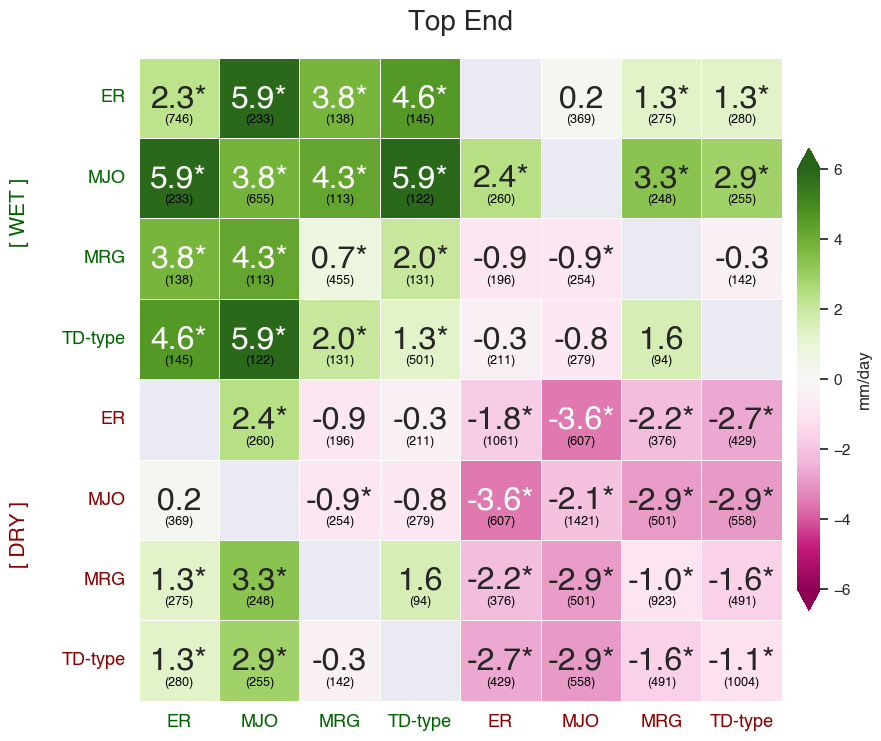

In [27]:
x2 = x.drop(x.columns[idrop], axis=1)
x2 = x2.drop(x.index[idrop])

x_sig2 = x_sig.drop(x_sig.columns[idrop], axis=1)
x_sig2 = x_sig2.drop(x_sig.index[idrop])


n_label2 = n_label.drop(n_label.columns[idrop], axis=1)
n_label2 = n_label2.drop(n_label.index[idrop])

fig = plt.figure(figsize = [10, 10])
g = sns.heatmap(x2,vmin=-6,vmax=6, 
                 annot = x_sig2, 
                 annot_kws={'fontsize':23,'fontweight':1000,'va':'bottom'},
                 fmt='', 
                 linewidths = .5,
                 cmap = plt.cm.get_cmap('PiYG'), cbar_kws={
                     'label': 'mm/day', 'shrink': 0.6, 'pad':0.02, 'extend':'both'},
                square=True,
               
               )

h = sns.heatmap(x2, 
                 annot = n_label2, 
                 annot_kws={'fontsize':9,'fontweight':10,'va':'top','color':'black'},
                 fmt='', 
                 linewidths = .5,
#                 cmap = "white",
                alpha = 0.0,
                cbar=False,
                square=True,
               
               )

import matplotlib
for t in h.texts:
    trans = t.get_transform()
    offs = matplotlib.transforms.ScaledTranslation(0., 0.2,
                    matplotlib.transforms.IdentityTransform())
    t.set_transform( offs + trans )


g.tick_params(axis='x', colors='darkgreen')
g.tick_params(axis='y', colors='darkgreen')

for label in enumerate(g.xaxis.get_ticklabels()):
    label[1].set_fontsize(13)
    if label[0]>3:
        label[1].set_color("darkred")
  
for label in enumerate(g.yaxis.get_ticklabels()):
    label[1].set_fontsize(13)
    label[1].set_rotation(-360)
#     print(label[0])
    if label[0]>3:
        label[1].set_color("darkred")

g.text(-1.6,2.3,"[ WET ]",fontsize=15,rotation=90,color="darkgreen",weight="extra bold")
g.text(-1.6,6.3,"[ DRY ]",fontsize=15,rotation=90,color="darkred",weight="extra bold")

g.set_title("Top End", fontsize=20, pad=20)

In [28]:
fig.savefig(diro+"combined_TE."+seas+".png",dpi=300)
fig.savefig(diro+"combined_TE."+seas+".eps", dpi=300)